# (2주차 ML) 3월 10일
> 생선 분류 문제 (KNN)

- toc: true
- branch: master
- badges: false
- comments: true
- author: dinonene
- categories: [python]

## 생선 분류 문제

### 도미(bream) 데이터 준비하기

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

Text(0, 0.5, 'weight')

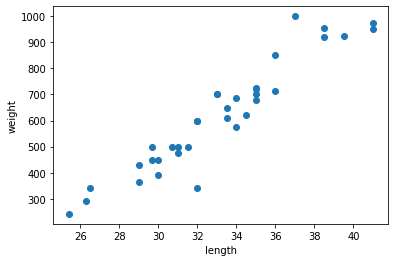

In [3]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # 몸 길이
plt.ylabel('weight') # 몸 무게

### 빙어(smelt) 데이터 준비하기

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

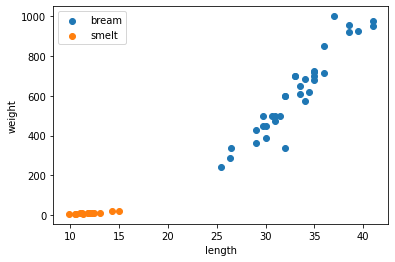

In [5]:
plt.scatter(bream_length, bream_weight, label='bream') ## 도미
plt.scatter(smelt_length, smelt_weight, label='smelt') ## 빙어
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

- 빙어는 길이가 늘어나더라도 무게가 많이 늘지 않는다. 
    $\Rightarrow$ 빙어의 산점도 역시 선형적이지만 무게가 길이에 영향을 덜 받는다.

### binary classification (도미, 빙어) 준비

- 다음으로 데이터만 보고 어떤 것이 도미이고 어떤 것이 빙어인지 스스로 구분하기 위해 프로그램을 만들어 보자!
- ***KNN(K-Nearest Neighbors)*** 방법을 이용할 것.

`-`  우선 KNN 알고리즘을 써먹으려면 도미와 빙어 데이터를 하나의 데이터로 합쳐야 한다.

In [6]:
## 두 리스트 하나로 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_length

- `+` 연산자가 list 일 경우에는 합쳐지는 역할을 하고, 정수일 때는 우리가 일반적으로 알고있는 덧셈 연산을 한다.

In [7]:
len(bream_length), len(smelt_length), len(bream_weight), len(smelt_length)

(35, 14, 35, 14)

In [8]:
len(length), len(weight)

(49, 49)

- 잘 합쳐진 것 같다.

`-`  2차원 리스트로 만들어 보자. (Scikit-learn을 사용하기위해)

```
## 이런 식으로 2차원 리스트로 만들것!

  길이   무게
[[25.4, 242.0],
 [26.3, 290.0].
   .      .
   .      .
   .      .
 [15.0, 19.9]]
```

In [9]:
fish_data = [[l,w] for l, w in zip(length, weight)]

`-` 정답 준비

- 도미(bream)를 1로 놓고, 빙어(smelt)를 0으로 놓자. (0과 1로 분류하는 이진분류)

In [10]:
fish_target = [1]*35 + [0]*14

### K-최근접 이웃

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
kn = KNeighborsClassifier() # class의 instance(객체) 를 만든다.

In [13]:
## kn 객체의 fit 메서드에 전달 (훈련)
kn.fit(fish_data, fish_target) ## kn을 모델이라 부름

KNeighborsClassifier()

- 머신러닝 프로그램의 알고리즘이 객체화 된것을 모델이라고 부른다.
- 종종 그 알고리즘 자체를 모델이라고도 부름.

In [14]:
## 평가 (얼마나 잘 맞췄나?)
kn.score(fish_data, fish_target)

1.0

- 100% 다 맞췄다! (100% 정확도 달성!)

### 새로운 생선 예측

- 그래프에 표시된 초록색 삼각형은 어떤 생선일까?

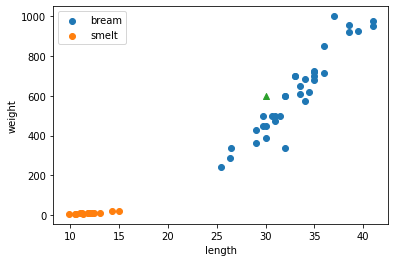

In [15]:
plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

- 직관적으로 봤을때 도미(bream) 일 것 같다.
- 실제로도 그런지 확인해보자.

In [16]:
kn.predict([[30, 600]]) ## predict method

array([1])

- predict method 안에 넣을 때도 2차원 배열 데이터를 넣어준다. (사이킷런이 기대하는 것)
- `n_neighbors=5`가 default, 주위에 있는 이웃의 개수(K)만큼 주변 샘플의 class 중 가장 많은 클래스를 정답클래스로 삼는다.

In [17]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    9.8]
 [  10.5   10.5]
 [  10.6   10.6]
 [  11.    11. ]
 [  11.2   11.2]
 [  11.3   11.3]
 [  11.8   11.8]
 [  11.8   11.8]
 [  12.    12. ]
 [  12.2   12.2]
 [  12.4   12.4]
 [  13.    13. ]
 [  14.3   14.3]
 [  15.    15. ]]


In [18]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### 무조건 도미

Fish 데이터의 총 개수는 49개이다. 이번에는 n_neighbors = 49로 지정 해보자.

In [19]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [20]:
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

In [21]:
kn49.score(fish_data, fish_target) ## 점수

0.7142857142857143

- score method : 훈련한 모델을 가지고 어떤 데이터를 집어 넣어서 얼마만큼 잘 맞는지를 확인해 보는 것이다.
- 분류문제일 경우에는 정확도를 출력 (모델이 어느정도 정확한지를 알아보는 메서드.)

In [22]:
print(35/49)

0.7142857142857143


- 이렇게 모델을 만들면 전체 샘플의 다수는 도미 $\to$ 무조건 다 도미
- `n_neighbors` 매개변수로 주위의 샘플개수를 바꿔볼 수도 있다. 바꾸면 알고리즘의 정확도가 높을수록, 낮을수도 있다.

### 확인 문제

In [23]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    #접수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
